The primary goal of this project is to perform K-Means clustering on the Iris dataset to identify meaningful clusters among different flower measurements (sepal and petal). The K-Means algorithm is used to group the data points into distinct clusters that can provide insights into the natural grouping of the flowers.

In [8]:
# Step 1: Import the necessary libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Iris dataset from scikit-learn
iris = load_iris()
# Convert it to a DataFrame for better data handling
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Adding target column for understanding the dataset (we will not use it in clustering)
df['target'] = iris.target

# Display the first few rows of the dataset
print(df.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [9]:
# Step 2: Check for null values
print(df.isnull().sum())

# Since this is a clean dataset, it likely won’t have missing values.
# However, if there are any, fill them or remove them as needed.

# Drop the 'target' column as it's not needed for clustering
df.drop(columns=['target'], inplace=True)

# Print basic information about the dataset
print(df.info())


sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB
None


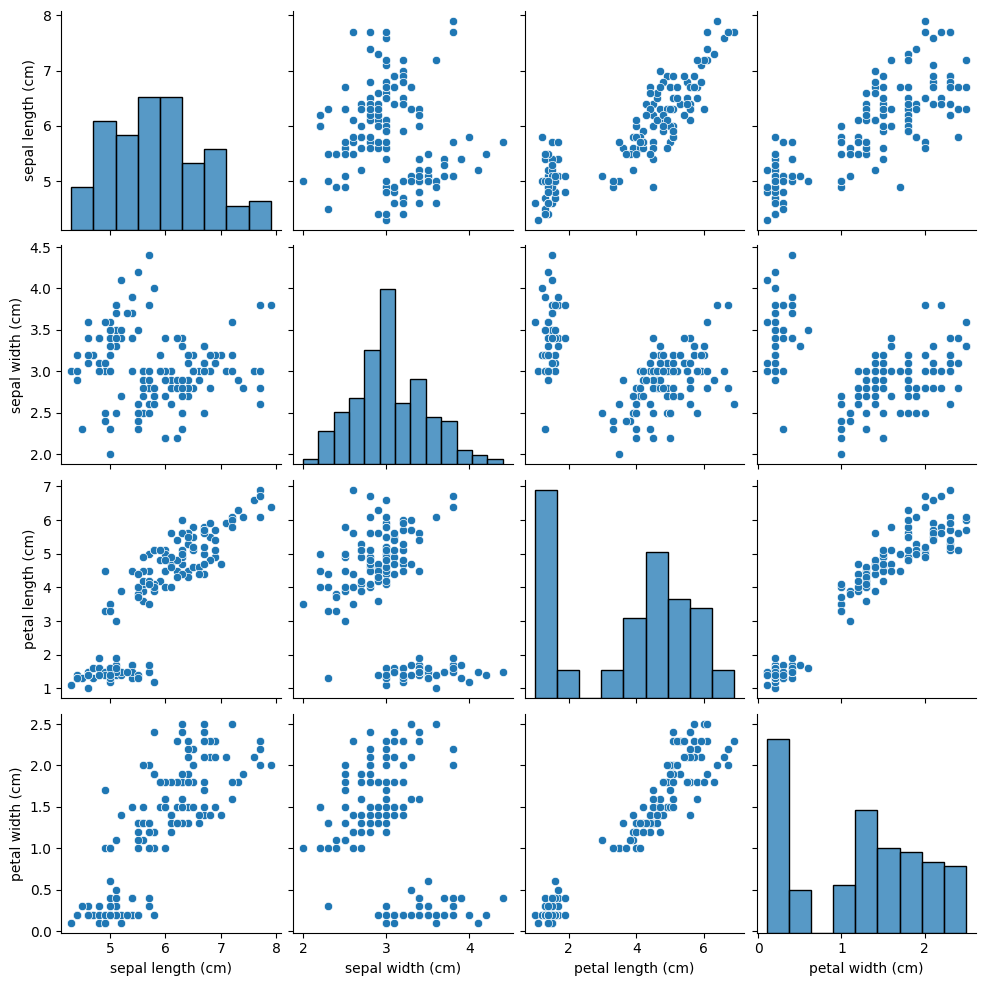

In [18]:
# Step 3: Visualize the dataset
sns.pairplot(pd.DataFrame(iris.data, columns=iris.feature_names))
plt.show()


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0           0.222222          0.625000           0.067797          0.041667
1           0.166667          0.416667           0.067797          0.041667
2           0.111111          0.500000           0.050847          0.041667
3           0.083333          0.458333           0.084746          0.041667
4           0.194444          0.666667           0.067797          0.041667


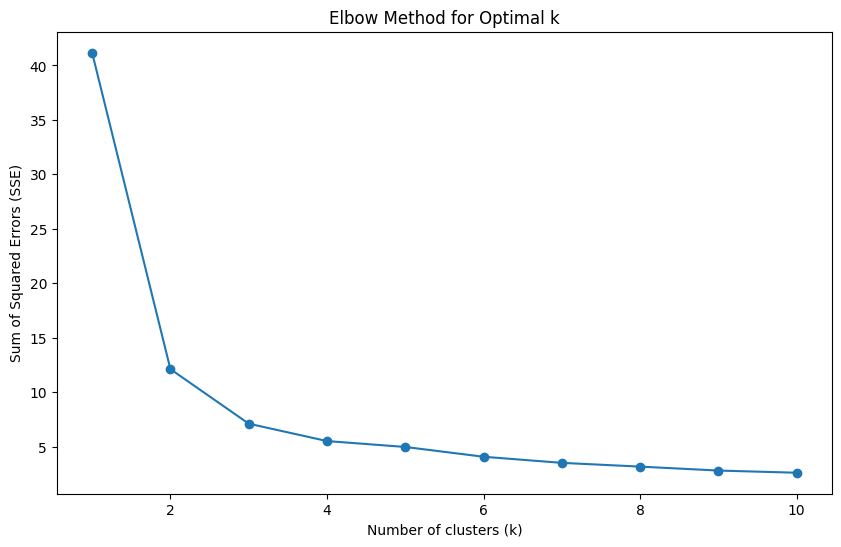

In [11]:
# Step 5: Determine optimal number of clusters using the Elbow Method
from sklearn.cluster import KMeans

# Ensure df_scaled is defined correctly
print(df_scaled.head())

# Initialize an empty list to store the Sum of Squared Errors
sse = []  # Sum of Squared Errors (SSE)

# Calculate SSE for each k (number of clusters) from 1 to 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)  # Make sure df_scaled is available and contains standardized numeric data
    sse.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Optimal k')
plt.show()


In [12]:
# Step 6: Apply K-Means with the optimal number of clusters
optimal_k = 3  # Based on the elbow method graph, typically 3 is used for the Iris dataset

# Initialize and fit K-Means
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['cluster'] = kmeans.fit_predict(df_scaled)

# Show the resulting dataset with cluster labels
print(df.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   cluster  
0        1  
1        1  
2        1  
3        1  
4        1  


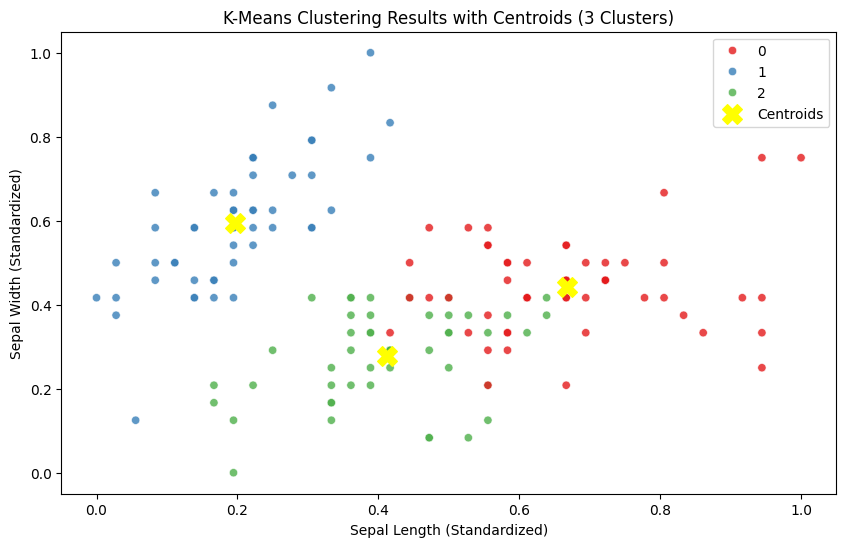

In [13]:
# Step 7: Visualize the clusters using a scatter plot with centroids
plt.figure(figsize=(10, 6))

# Scatter plot for clustered data points
sns.scatterplot(x=df_scaled['sepal length (cm)'], y=df_scaled['sepal width (cm)'], hue=df['cluster'], palette='Set1', alpha=0.8)

# Add centroids to the plot
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='yellow', marker='X', label='Centroids')

# Add plot details
plt.title('K-Means Clustering Results with Centroids (3 Clusters)')
plt.xlabel('Sepal Length (Standardized)')
plt.ylabel('Sepal Width (Standardized)')
plt.legend()
plt.show()


Cluster 0 (Red):

Likely represents flowers with smaller sepals (shorter length).
Could correspond to Iris Setosa.

Cluster 1 (Blue):

Likely represents flowers with larger sepal length and width.
Could correspond to Iris Virginica.

Cluster 2 (Green):

Likely represents flowers with medium-sized sepals (in between the other two clusters).
Could correspond to Iris Versicolor.


PCA...clubbing similar iteams

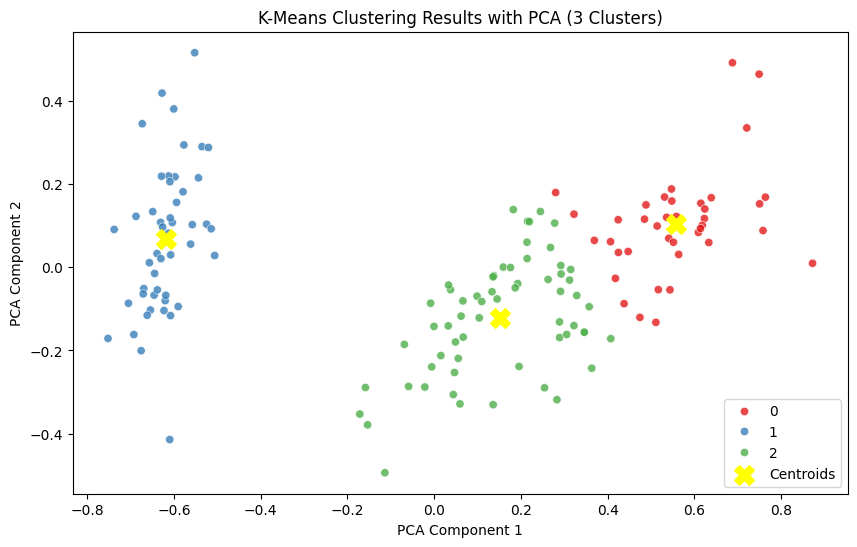

In [15]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Step 2: Feature Scaling using MinMaxScaler
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)

# Step 3: Apply PCA to reduce dimensions
pca = PCA(n_components=2)  # Reduce to 2 dimensions
df_pca = pca.fit_transform(df_scaled)

# Convert the PCA result into a DataFrame
df_pca = pd.DataFrame(df_pca, columns=['PCA1', 'PCA2'])

# Step 4: Apply K-Means Clustering on the PCA-reduced data
kmeans = KMeans(n_clusters=3, random_state=42)
df_pca['cluster'] = kmeans.fit_predict(df_pca)

# Step 5: Visualize the clusters using the PCA components
plt.figure(figsize=(10, 6))

# Scatter plot of the clusters
sns.scatterplot(x='PCA1', y='PCA2', hue='cluster', data=df_pca, palette='Set1', alpha=0.8)

# Plot the centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='yellow', marker='X', label='Centroids')

# Add plot details
plt.title('K-Means Clustering Results with PCA (3 Clusters)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()


In [14]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

# Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Feature scaling using MinMaxScaler
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(df_scaled)

# Step 1: Analyze the characteristics of each cluster by calculating the average value of each feature
cluster_analysis = df.groupby('cluster').mean()
print("Cluster Analysis:\n")
print(cluster_analysis)

# Step 2: Add actual species labels to the DataFrame for comparison
df['species'] = iris.target

# Step 3: Compare clusters with actual species
cluster_species_comparison = df.groupby(['cluster', 'species']).size()
print("\nCluster-Species Comparison:\n")
print(cluster_species_comparison)

# Step 4: Interpretation of clusters
print("\nCluster Interpretation:\n")

for cluster_id, row in cluster_analysis.iterrows():
    print(f"Cluster {cluster_id} Characteristics:")
    print(f"  Sepal Length Mean: {row['sepal length (cm)']:.2f}")
    print(f"  Sepal Width Mean: {row['sepal width (cm)']:.2f}")
    print(f"  Petal Length Mean: {row['petal length (cm)']:.2f}")
    print(f"  Petal Width Mean: {row['petal width (cm)']:.2f}")

    # Make educated guesses about the species
    if row['sepal length (cm)'] < 5.5 and row['petal length (cm)'] < 2:
        print(f"  Likely corresponds to Iris Setosa.\n")
    elif row['sepal length (cm)'] > 6.0 and row['petal length (cm)'] > 4.5:
        print(f"  Likely corresponds to Iris Virginica.\n")
    else:
        print(f"  Likely corresponds to Iris Versicolor.\n")


Cluster Analysis:

         sepal length (cm)  sepal width (cm)  petal length (cm)  \
cluster                                                           
0                 6.703846          3.063462           5.467308   
1                 5.006000          3.428000           1.462000   
2                 5.783333          2.664583           4.297917   

         petal width (cm)  
cluster                    
0                1.976923  
1                0.246000  
2                1.350000  

Cluster-Species Comparison:

cluster  species
0        1          10
         2          42
1        0          50
2        1          40
         2           8
dtype: int64

Cluster Interpretation:

Cluster 0 Characteristics:
  Sepal Length Mean: 6.70
  Sepal Width Mean: 3.06
  Petal Length Mean: 5.47
  Petal Width Mean: 1.98
  Likely corresponds to Iris Virginica.

Cluster 1 Characteristics:
  Sepal Length Mean: 5.01
  Sepal Width Mean: 3.43
  Petal Length Mean: 1.46
  Petal Width Mean: 0.25
  Lik

Business Requirements Document (BRD) for K-Means Clustering on the Iris Dataset

1. Objective

The primary goal of this project is to perform K-Means clustering on the Iris dataset to identify meaningful clusters among different flower measurements (sepal and petal). The K-Means algorithm is used to group the data points into distinct clusters that can provide insights into the natural grouping of the flowers.

2. Project Scope

This document describes the steps involved in executing K-Means clustering on the Iris dataset. It also aims to explain the purpose of each step, including data exploration, feature scaling, determining the optimal number of clusters, and visualizing the results.

3. Dataset Overview

Dataset Name: Iris dataset (also referred to as the Irish dataset)

Source: Scikit-learn library

Features:

Sepal Length (cm)

Sepal Width (cm)

Petal Length (cm)

Petal Width (cm)

Target Column: The dataset includes a target column indicating the species (not used for clustering).

4. Technical Approach

Step 1: Import Necessary Libraries

Import Pandas, NumPy, Matplotlib, Seaborn, and Scikit-Learn.

Purpose: These libraries are essential for data handling, visualization, and applying the clustering model.

Step 2: Load and Inspect the Dataset

Load the Iris dataset using load_iris() from Scikit-learn.

Convert the dataset to a Pandas DataFrame for easier data handling.

Check for missing values: Although the dataset is usually clean, it's good practice to ensure there are no missing values.

Drop the target column since we will be using unsupervised learning.

Step 3: Data Visualization (EDA)

Pair Plot: Use Seaborn to create a pair plot that shows scatter plots for each feature pair. This helps in understanding the relationships between the features.

Distribution Plot: Plot the distribution of each feature to understand their spread and potential outliers.

Step 4: Feature Scaling

Use StandardScaler or MinMaxScaler to scale the data.

Scaling is necessary for K-Means as it is sensitive to the magnitude of the features.

Step 5: Determine Optimal Number of Clusters (Elbow Method)

Use the Elbow Method to determine the optimal number of clusters (k).

The Sum of Squared Errors (SSE) is calculated for a range of k values (from 1 to 10).

Plot the SSE against the number of clusters to determine the "elbow point," which is usually where the rate of decrease sharply slows down.

Step 6: Apply K-Means Clustering

Use the optimal number of clusters (k=3) based on the elbow plot.

Fit the K-Means model on the scaled data to form three clusters.

Add the cluster labels to the DataFrame to understand which data points belong to which cluster.

Step 7: Visualize Clustering Results

Scatter Plot: Visualize the clustered data using a scatter plot, with each cluster represented by a different color.

Centroids: Plot the centroids of each cluster as yellow 'X' markers to represent the center of each cluster.

This helps in understanding the groups and the separations between different clusters.

5. Deliverables

A well-documented Jupyter Notebook or Google Colab Notebook containing:

The complete Python code for K-Means clustering.

Visualizations to explain the relationships between features and the clusters.

An explanation of the steps and methods used in the clustering process.

6. Assumptions

The dataset is free of missing values and does not require advanced imputation.

The optimal number of clusters (k=3) has been determined to be appropriate based on the characteristics of the Iris dataset.

7. Constraints

The clustering algorithm (K-Means) is limited by the assumption that clusters are spherical and may not perform well if the data is non-linearly separable.

The results are purely based on the features provided and cannot account for factors not included in the dataset.

8. Future Enhancements

Silhouette Analysis can be used to further validate the quality of the clusters.

Implement other clustering algorithms like DBSCAN or Hierarchical Clustering to compare results.

Apply Principal Component Analysis (PCA) to reduce dimensions and visualize clusters in 2D or 3D space more effectively.

9. Conclusion

The project aims to leverage K-Means clustering to understand how the flowers in the Iris dataset can be grouped based on similarities. The clustering results can provide insights into the natural groupings of the data points, which might correspond to different flower species.
